In [9]:
from __future__ import print_function                  # Allows for python3 printing
import keras
from keras.datasets import cifar10                    # import function to load cifar10 dataset
from keras.models import Model
from keras.layers import Input, Dense, Activation, Flatten,Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras import optimizers

In [19]:
import pandas
sample = pandas.read_csv("sampleSubmission.csv") 
sample

,id,label
0,1,cat
1,2,cat
2,3,cat
3,4,cat
4,5,cat
5,6,cat
6,7,cat
7,8,cat
8,9,cat
9,10,cat


In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [11]:
class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

the shape of training data is: (50000, 32, 32, 3) (50000, 1)
the shape of testing data is: (10000, 32, 32, 3) (10000, 1)
the range of features is: 0 to 255
the range of labels is: 0 to 9
label 1 is [6]
label 2 is [9]
label 3 is [9]
label 4 is [4]
label 5 is [1]


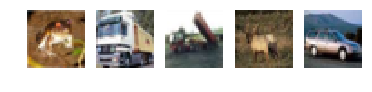

In [12]:
print ('the shape of training data is:',x_train.shape,y_train.shape)       #print data shape
print ('the shape of testing data is:',x_test.shape,y_test.shape)

import numpy as np
print ('the range of features is:',np.min(x_train),'to',np.max(x_train))
print ('the range of labels is:',np.min(y_train),'to',np.max(y_train))

import matplotlib.pyplot as plt
% matplotlib inline
for i in range(5):
    image = x_train[i]
    plt.subplot(1,5, i+1)
    #image = image.reshape(64,64)
    print ('label', i+1, 'is',y_train[i])
    plt.imshow(image, cmap='Greys')
    plt.axis('off')

In [13]:
# convert class vectors to binary class matrices
x_train = x_train/255.0
x_test = x_test/255.0
y_train = keras.utils.to_categorical(y_train[:,0], num_classes=10)
y_test = keras.utils.to_categorical(y_test[:,0], num_classes=10)

In [10]:
def ConvNet(num_classes=10):

    images = Input(shape=(32, 32, 3))           #use input shape that matches image size
    
    # Convolutional layers
    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(images)  #conv layer1
    x = Dropout(0.25)(x)                     #dropout layer1
    
    x = Conv2D(filters=64, kernel_size=(2, 2), activation='relu')(x)   #conv layer2
    x = MaxPooling2D(pool_size=(2, 2))(x)  #pooling layer2
    x = Dropout(0.5)(x)                     #dropout layer1

    # Fully-connected layer: 
    x = Flatten()(x)          
    x = Dense(200)(x)         #200 neurons fc layer
    x = Dense(units=num_classes, activation='softmax')(x)

    # Instantiate a model based on inputs/outputs
    model = Model(inputs=images, outputs=x)

    # Configure the model for training. 
    model.compile(
            loss='categorical_crossentropy',
            optimizer=optimizers.Adam(),
            metrics=[
                'categorical_accuracy',
                keras.metrics.top_k_categorical_accuracy])

    return model

In [11]:
model = ConvNet()
model.fit(
        x=x_train,
        y=y_train,
        epochs=30,
        shuffle=True)

Epoch 1/30
50000/50000 [==============================] - 129s 3ms/step - loss: 1.5379 - categorical_accuracy: 0.4562 - top_k_categorical_accuracy: 0.8979
Epoch 2/30
50000/50000 [==============================] - 129s 3ms/step - loss: 1.1973 - categorical_accuracy: 0.5778 - top_k_categorical_accuracy: 0.9512
Epoch 3/30
50000/50000 [==============================] - 131s 3ms/step - loss: 1.0865 - categorical_accuracy: 0.6178 - top_k_categorical_accuracy: 0.9609
Epoch 4/30
50000/50000 [==============================] - 141s 3ms/step - loss: 1.0240 - categorical_accuracy: 0.6405 - top_k_categorical_accuracy: 0.9673
Epoch 5/30
50000/50000 [==============================] - 127s 3ms/step - loss: 0.9757 - categorical_accuracy: 0.6588 - top_k_categorical_accuracy: 0.9720
Epoch 6/30
50000/50000 [==============================] - 134s 3ms/step - loss: 0.9440 - categorical_accuracy: 0.6711 - top_k_categorical_accuracy: 0.9727
Epoch 7/30
50000/50000 [==============================] - 131s 3ms/ste

In [12]:
train_score = model.evaluate(x_train, y_train)       # evaluate model on training dataset
test_score = model.evaluate(x_test, y_test)          # evaluate model on testing dataset

print ('\n')                                         # start from a new line      
print('Training accuracy:', train_score[1])          # print out training accuracy
print('Testing accuracy:', test_score[1])            # print out testing accuracy

10000/10000 [==============================] - 5s 488us/step


Training accuracy: 0.83588
Testing accuracy: 0.6944


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)             0         
__________

In [14]:
model.save('10.h5')

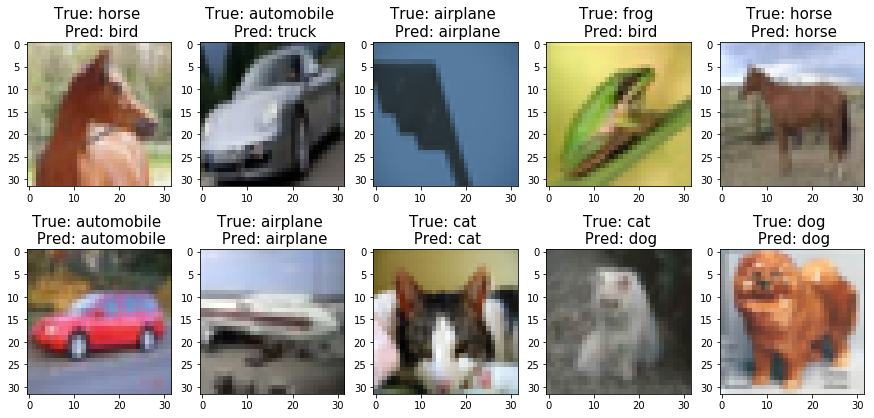

In [15]:
import numpy as np
rand_id = np.random.choice(range(10000), size=10)
X_pred = np.array([x_test[i] for i in rand_id])
y_true = [y_test[i] for i in rand_id]
y_true = np.argmax(y_true, axis=1)
y_true = [class_name[name] for name in y_true]
y_pred = model.predict(X_pred)
y_pred = np.argmax(y_pred, axis=1)
y_pred = [class_name[name] for name in y_pred]
plt.figure(figsize=(15, 7))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_pred[i].reshape(32, 32, 3), cmap='gray')
    plt.title('True: %s \n Pred: %s' % (y_true[i], y_pred[i]), size=15)
plt.show()


In [14]:
from keras.models import load_model
model = load_model('10.h5')

In [15]:
import math
import pandas as pd
def submitFile(modelFile, saveFile, model):
    # model.load_weights(modelFile)
    x_test[1] = (x_test[1] - x_test[1].mean(axis=0)) / (x_test[1].std(axis=0))
    bs = 100
    steps = math.ceil(int(x_test.shape[0])/bs)
    print ("Steps - " + str(steps))
    pred = model.predict(x_test)
    y_pred = np.argmax(pred, axis=1)
    labels = labelsToStrings(y_pred)
    labels.to_csv(saveFile)

In [16]:
def labelsToStrings(data):
    ret = []
    for label in data:
        temp = ''
        
        if(label == 0): temp = 'airplane'
        if(label == 1): temp = 'automobile'
        if(label == 2): temp = 'bird'
        if(label == 3): temp = 'cat'
        if(label == 4): temp = 'deer'
        if(label == 5): temp = 'dog'
        if(label == 6): temp = 'frog'
        if(label == 7): temp = 'horse'
        if(label == 8): temp = 'ship'
        if(label == 9): temp = 'truck'
        
        ret.append(temp)
    
    label_id = np.arange(data.shape[0]) + 1
    s = pd.Series(ret, index=label_id)
    s = s.to_frame('label')
    s.index.name='id'
    
    return s

In [17]:
submitFile(modelFile='10.h5', saveFile='cifar10_submit_' + '.csv', model=model)

Steps - 100


In [20]:
submit = pandas.read_csv("cifar10_submit_.csv") 
submit

,id,label
0,1,cat
1,2,automobile
2,3,ship
3,4,airplane
4,5,frog
5,6,frog
6,7,automobile
7,8,frog
8,9,cat
9,10,automobile
